## AI & Machine Learning for Data Quality
**Description**: AI and machine learning can automate and enhance data quality checks by learning patterns and identifying anomalies more effectively than static rules.

**Task 1**: Training a model to predict and flag unusual trend patterns in sales data that
deviate from historical norms.

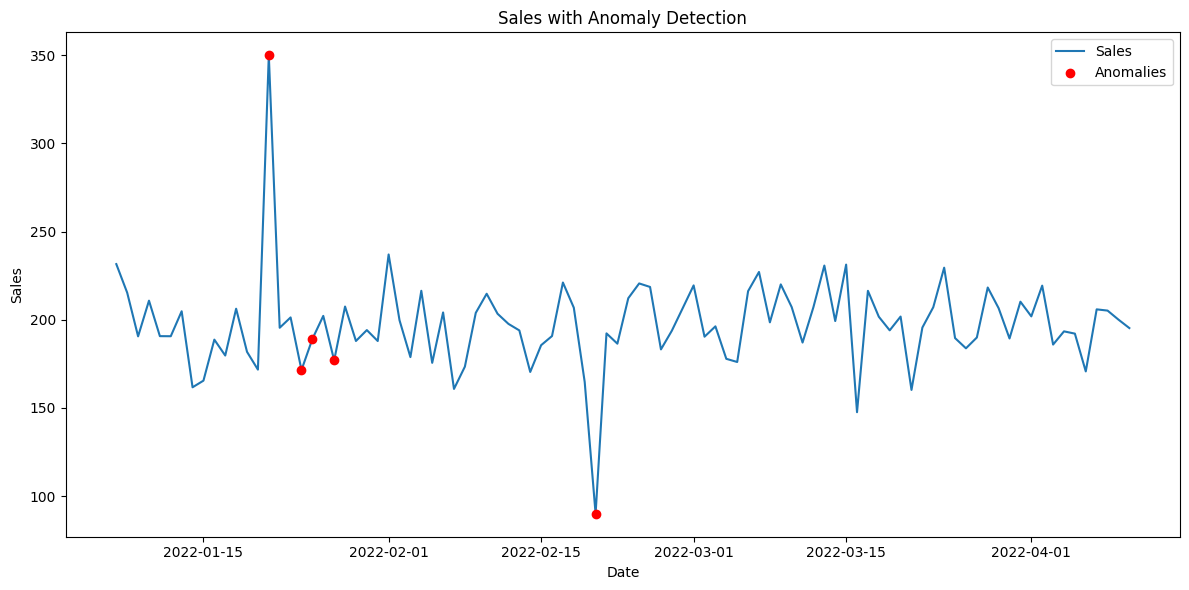

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Step 1: Simulate Historical Sales Data (or load your real dataset)
np.random.seed(42)
date_range = pd.date_range(start="2022-01-01", periods=100, freq='D')
sales = np.random.normal(loc=200, scale=20, size=100)

# Inject anomalies
sales[20] = 350  # unusually high sale
sales[50] = 90   # unusually low sale

df = pd.DataFrame({"date": date_range, "sales": sales})

# Step 2: Feature Engineering (Add rolling average and std)
df["rolling_mean_7"] = df["sales"].rolling(window=7).mean()
df["rolling_std_7"] = df["sales"].rolling(window=7).std()
df = df.dropna().reset_index(drop=True)

# Step 3: Normalize features
features = df[["sales", "rolling_mean_7", "rolling_std_7"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Step 4: Fit Isolation Forest for Anomaly Detection
model = IsolationForest(contamination=0.05, random_state=42)
df["anomaly_score"] = model.fit_predict(X_scaled)
df["is_anomaly"] = df["anomaly_score"] == -1

# Step 5: Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="sales", label="Sales")
plt.scatter(df[df["is_anomaly"]]["date"], df[df["is_anomaly"]]["sales"], color='red', label="Anomalies", zorder=5)
plt.title("Sales with Anomaly Detection")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

**Task 2**: Using clustering algorithms to detect duplicate records where entries are not
exactly identical.

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_distances
import numpy as np

# Step 1: Sample Data
data = {
    "name": [
        "John Smith", "Jon Smith", "Johnny Smith",
        "Jane Doe", "Janet Doe", "Jane D.",
        "Michael Jordan", "Micheal Jordan", "Mike Jordan",
        "Emily Stone", "Emma Stone"
    ]
}

df = pd.DataFrame(data)

# Step 2: Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 4))
X = vectorizer.fit_transform(df["name"])

# Step 3: Use cosine distance for DBSCAN
db = DBSCAN(eps=0.3, min_samples=2, metric='cosine')
df["cluster"] = db.fit_predict(X)

# Step 4: Display Results
print("Detected Potential Duplicates (Grouped by Cluster):\n")
for cluster in sorted(df["cluster"].unique()):
    if cluster == -1:
        continue  # -1 means noise (no cluster)
    group = df[df["cluster"] == cluster]["name"].tolist()
    print(f"Cluster {cluster}: {group}")

Detected Potential Duplicates (Grouped by Cluster):

Cluster 0: ['John Smith', 'Johnny Smith']
Cluster 1: ['Jane Doe', 'Janet Doe']


**Task 3**: Implementing classification models to validate data based on learned
characteristics from labeled datasets.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Step 1: Create a mock labeled dataset
data = {
    "age": [25, 30, 17, 200, 45, -1, 34, 29],
    "salary": [50000, 60000, 10000, 120000, 75000, 30000, 68000, 70000],
    "years_experience": [2, 5, 0.5, 40, 10, 1, 7, 6],
    "label": [1, 1, 0, 0, 1, 0, 1, 1]  # 1 = Valid, 0 = Invalid
}

df = pd.DataFrame(data)

# Step 2: Split data into features and target
X = df.drop("label", axis=1)
y = df["label"]

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 4: Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict on test set
y_pred = model.predict(X_test)

# Step 6: Evaluate performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Accuracy Score: 1.0
